# Allegheny dataset

## Step 1: import libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

## Step 2: Define functions

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df):
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Allegheny Data', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, textSize):
    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## Step 3: Load data

In [16]:
nRowsRead = None # specify 'None' if want to read whole file
# PropertySaleTransactions.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../../input data/PropertySaleTransactions.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'PropertySaleTransactions.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

C:\Users\sarah\AppData\Local\Temp\ipykernel_15500\2028245311.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../../input data/PropertySaleTransactions.csv', delimiter=',', nrows = nRowsRead)


There are 307756 rows and 24 columns


In [17]:
df2.head(5)

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,...,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
0,1075F00108000000,4720.0,,NaN,HIGHPOINT,DR,NaN,NaN,GIBSONIA,PA,...,Hampton,2012-09-27,2012-09-27,120000.0,15020,356.0,3,LOVE AND AFFECTION SALE,DE,DEED
1,0011A00237000000,0.0,,NaN,LOMBARD,ST,NaN,NaN,PITTSBURGH,PA,...,3rd Ward - PITTSBURGH,2015-01-06,2015-01-06,1783.0,TR15,2.0,2,CITY TREASURER SALE,TS,TREASURER DEED
2,0011J00047000000,1903.0,,NaN,FORBES,AVE,NaN,NaN,PITTSBURGH,PA,...,1st Ward - PITTSBURGH,2012-10-26,2012-10-26,4643.0,TR13,3.0,2,CITY TREASURER SALE,TS,TREASURER DEED
3,0113B00029000000,479.0,,NaN,ROOSEVELT,AVE,NaN,NaN,PITTSBURGH,PA,...,Bellevue,2017-03-27,2017-03-06,0.0,16739,166.0,3,LOVE AND AFFECTION SALE,CO,CORRECTIVE DEED
4,0119S00024000000,5418.0,,NaN,CARNEGIE,ST,NaN,NaN,PITTSBURGH,PA,...,10th Ward - PITTSBURGH,2015-02-04,2015-02-04,27541.0,TR15,59.0,GV,GOVERNMENT SALE,TS,TREASURER DEED


## Step 4: Clean data

In [18]:
df2 = df2.dropna()

In [19]:
df2.head()


,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,...,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
572,0084P00171000200,384.0,,S,HIGHLAND,AVE,UNIT,2,PITTSBURGH,PA,...,7th Ward - PITTSBURGH,2016-10-17,2016-09-22,156000.0,16572,170.0,99,CORRECTIVE DEED / DUPLICATE SALE,CO,CORRECTIVE DEED
862,0084K00298020300,333.0,,S,HIGHLAND,AVE,UNIT,203,PITTSBURGH,PA,...,7th Ward - PITTSBURGH,2012-01-03,2012-01-03,1.0,14778,513.0,3,LOVE AND AFFECTION SALE,SW,SPECIAL WARRANTY
893,0052E00033005400,552.0,,N,NEVILLE,ST,UNIT,54,PITTSBURGH,PA,...,4th Ward - PITTSBURGH,2012-01-03,2012-01-03,95000.0,14779,276.0,0,VALID SALE,DE,DEED
1458,0052E00011030200,128.0,,N,CRAIG,ST,UNIT,302,PITTSBURGH,PA,...,4th Ward - PITTSBURGH,2012-01-06,2012-01-06,90000.0,14782,428.0,AA,SALE NOT ANALYZED,GW,GENERAL WARRANTY
3291,0085A00168000600,724.0,,S,NEGLEY,AVE,UNIT,6,PITTSBURGH,PA,...,7th Ward - PITTSBURGH,2012-02-13,2012-02-13,380000.0,14809,529.0,AA,SALE NOT ANALYZED,DE,DEED


In [20]:
df2 = df2.drop(columns = ['PARID', 'PROPERTYADDRESSDIR', 'PROPERTYADDRESSSTREET', 'PROPERTYADDRESSUNITDESC', 'SCHOOLDESC', 'MUNIDESC', 'RECORDDATE', 'SALEDESC', 'INSTRTYP', 'INSTRTYPDESC'])

In [21]:
df2.head()

,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSSUF,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,PROPERTYZIP,SCHOOLCODE,MUNICODE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE
572,384.0,,AVE,2,PITTSBURGH,PA,15206.0,47,107,2016-09-22,156000.0,16572,170.0,99
862,333.0,,AVE,203,PITTSBURGH,PA,15206.0,47,107,2012-01-03,1.0,14778,513.0,3
893,552.0,,ST,54,PITTSBURGH,PA,15213.0,47,104,2012-01-03,95000.0,14779,276.0,0
1458,128.0,,ST,302,PITTSBURGH,PA,15213.0,47,104,2012-01-06,90000.0,14782,428.0,AA
3291,724.0,,AVE,6,PITTSBURGH,PA,15232.0,47,107,2012-02-13,380000.0,14809,529.0,AA


In [26]:
arr = pd.get_dummies(df2.PROPERTYADDRESSSUF)
arr.head()

df3 = df2.join(arr)
df3.head()
df3 = df3.drop(columns=["PROPERTYADDRESSSUF"])
df3 = df3.drop(columns=["SALECODE"])
df3 = df3.drop(columns=["PROPERTYUNITNO"])
df3 = df3.drop(columns=["PROPERTYCITY"])
df3 = df3.drop(columns=["PROPERTYSTATE"])
df3 = df3.drop(columns=["PROPERTYFRACTION"])
df3.SALEDATE = pd.to_datetime(df3.SALEDATE)
df3.SALEDATE = pd.to_numeric(df3.SALEDATE)

In [27]:
df3.head(1000)

,PROPERTYHOUSENUM,PROPERTYZIP,SCHOOLCODE,MUNICODE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,AVE,RD,ST
572,384.0,15206.0,47,107,1474502400000000000,156000.0,16572,170.0,True,False,False
862,333.0,15206.0,47,107,1325548800000000000,1.0,14778,513.0,True,False,False
893,552.0,15213.0,47,104,1325548800000000000,95000.0,14779,276.0,False,False,True
1458,128.0,15213.0,47,104,1325808000000000000,90000.0,14782,428.0,False,False,True
3291,724.0,15232.0,47,107,1329091200000000000,380000.0,14809,529.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
306339,227.0,15202.0,29,802,1575936000000000000,60000.0,17874,87.0,True,False,False
306540,363.0,15206.0,47,107,1598659200000000000,255000.0,18177,352.0,True,False,False
306934,166.0,15213.0,47,104,1601942400000000000,1.0,18199,129.0,False,False,True
307163,220.0,15213.0,47,104,1577750400000000000,253500.0,17897,126.0,False,False,True


In [28]:
corr = df3.corr()
corr

,PROPERTYHOUSENUM,PROPERTYZIP,SCHOOLCODE,MUNICODE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,AVE,RD,ST
PROPERTYHOUSENUM,1.000000,0.105752,-0.000814,0.010185,-0.018038,0.073498,-0.017862,0.059883,0.197862,-0.028812,-0.195579
PROPERTYZIP,0.105752,1.000000,0.406345,-0.485727,0.000940,0.086755,0.001134,-0.011168,-0.180847,0.125790,0.171519
SCHOOLCODE,-0.000814,0.406345,1.000000,-0.966286,0.017815,0.164220,0.019025,-0.011557,-0.313625,0.012219,0.312443
MUNICODE,0.010185,-0.485727,-0.966286,1.000000,-0.023896,-0.173279,-0.024882,0.012076,0.313526,-0.011395,-0.312404
SALEDATE,-0.018038,0.000940,0.017815,-0.023896,1.000000,0.120418,0.994896,-0.019442,-0.032453,-0.010777,0.033208
PRICE,0.073498,0.086755,0.164220,-0.173279,0.120418,1.000000,0.115468,0.004944,0.032011,0.057371,-0.036158
DEEDBOOK,-0.017862,0.001134,0.019025,-0.024882,0.994896,0.115468,1.000000,-0.020810,-0.033503,-0.012313,0.034369
DEEDPAGE,0.059883,-0.011168,-0.011557,0.012076,-0.019442,0.004944,-0.020810,1.000000,-0.028778,0.015840,0.027598
AVE,0.197862,-0.180847,-0.313625,0.313526,-0.032453,0.032011,-0.033503,-0.028778,1.000000,-0.023615,-0.997347
RD,-0.028812,0.125790,0.012219,-0.011395,-0.010777,0.057371,-0.012313,0.015840,-0.023615,1.000000,-0.049223


## Step 5: Create correlation matrix

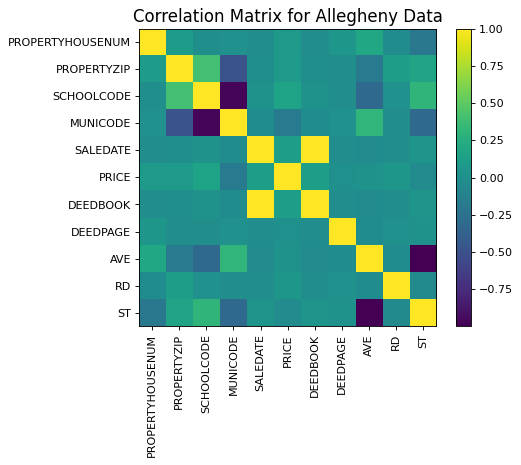

In [29]:
plotCorrelationMatrix(df3)

## Step 6: Save files

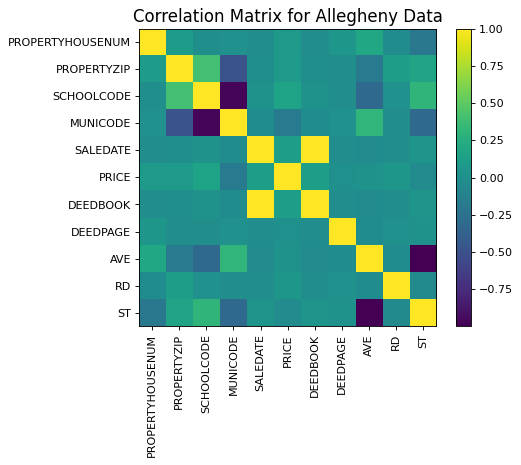

<Figure size 640x480 with 0 Axes>

In [30]:
timestr = time.strftime("%Y%m%d-%H%M%S")
plotCorrelationMatrix(df3)
plt.savefig('../../output data/CorrMatrixAllegheny ' + timestr + '.png', bbox_inches='tight', pad_inches=0.0)

In [75]:
timestr = time.strftime("%Y%m%d-%H%M%S")
df3.to_excel("../../output data/allegheny "+timestr +".xlsx", sheet_name="Allegheny", index=False)